# Welcome to Jupyter!

This repo contains an introduction to [Jupyter](https://jupyter.org) and [IPython](https://ipython.org).

Outline of some basics:

* [Notebook Basics](../examples/Notebook/Notebook%20Basics.ipynb)
* [IPython - beyond plain python](../examples/IPython%20Kernel/Beyond%20Plain%20Python.ipynb)
* [Markdown Cells](../examples/Notebook/Working%20With%20Markdown%20Cells.ipynb)
* [Rich Display System](../examples/IPython%20Kernel/Rich%20Output.ipynb)
* [Custom Display logic](../examples/IPython%20Kernel/Custom%20Display%20Logic.ipynb)
* [Running a Secure Public Notebook Server](../examples/Notebook/Running%20the%20Notebook%20Server.ipynb#Securing-the-notebook-server)
* [How Jupyter works](../examples/Notebook/Multiple%20Languages%2C%20Frontends.ipynb) to run code in different languages.

You can also get this tutorial and run it on your laptop:

    git clone https://github.com/ipython/ipython-in-depth

Install IPython and Jupyter:

with [conda](https://www.anaconda.com/download):

    conda install ipython jupyter

with pip:

    # first, always upgrade pip!
    pip install --upgrade pip
    pip install --upgrade ipython jupyter

Start the notebook in the tutorial directory:

    cd ipython-in-depth
    jupyter notebook

In [26]:
# import libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import math

# set custom plotting values
mpl.rcParams['figure.figsize'] = (8,8)
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20 
mpl.rcParams['ytick.labelsize'] = 20 
mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['lines.markersize'] = 1000
mpl.rcParams['legend.fontsize'] = 18

In [27]:
# raw data, log of data, and helper index
Cases = [7, 9, 13, 19, 32, 46, 66, 93, 105, 160, 288, 422, 585, 753, 1049, 1285,1535 ,1865, 2538]
LogCases = [math.log(x) for x in Cases]
DayIndex = np.linspace(1,len(Cases), len(Cases))

In [56]:
# fit log of cases to a linear model and get parameters
xmean = sum(DayIndex) / len(DayIndex)
ymean = sum(LogCases) / len(LogCases)

b1_num = 0
b1_den = 0

for idx in range(0,len(DayIndex)):
    b1_num += (DayIndex[idx] - xmean) * (LogCases[idx] - ymean) 
    b1_den += (DayIndex[idx] - xmean)**2

slope = b1_num / b1_den
const = ymean - b1 * xmean

print ('predicted const is %f' % const)
print ('predicted slope is %f' % slope)

predicted const is 1.704625
predicted slope is 0.339656


In [80]:
# define linear and exponential functions

def linear_function(const, slope, xArray):
    y = [const + slope * x for x in xArray]
    return y

def exponential(const, slope, xArray):
    y = [math.exp(const + slope * x) for x in xArray]
    return y

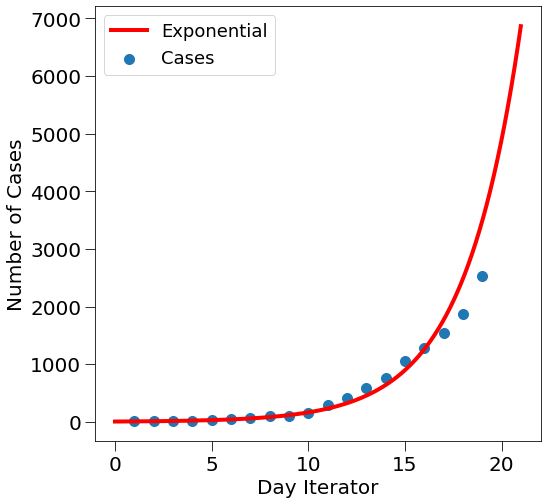

In [82]:
x_plot = np.arange(0, 21, 0.01)

plt.figure()
plt.scatter(DayIndex, Cases, s = 100, Label = 'Cases')
plt.plot(x_plot, exponential(const, slope, x_plot), 'r', Label = 'Exponential')
plt.xlabel ("Day Iterator")
plt.ylabel ("Number of Cases")
plt.legend()
plt.show()

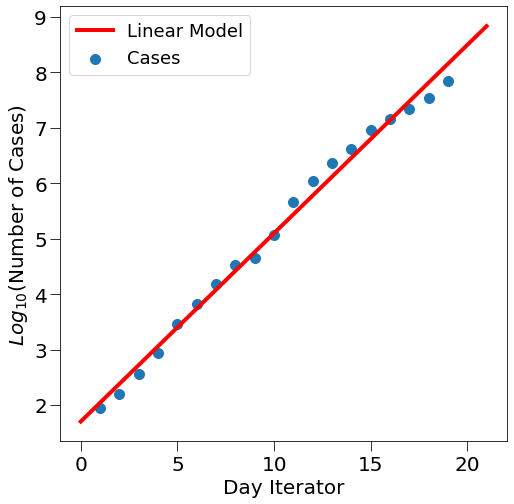

In [83]:
plt.figure()
plt.scatter(DayIndex, LogCases, s = 100, Label = 'Cases')
plt.plot(x_plot, linear_function(const, slope, x_plot), 'r', Label = 'Linear Model')
plt.xlabel ("Day Iterator")
plt.ylabel ("$Log_{10}$(Number of Cases)")
plt.legend()
plt.show()